In [9]:
import numpy                    # 행렬 연산 등 외부 모듈 이용
import scipy.special            # 시그모이드 함수 등 외부 모듈 이용
import matplotlib.pyplot as plt # 이미지 출력 imshow 등 외부 모듈 이용
# IPython 노트북내에 화면이 표시되는 인라인모드 On
%matplotlib inline        

In [10]:
class MyNeuralNetwork:
    def __init__(self, inputNodesCnt, hiddenNodesCnt, outputNodesCnt, learningRate):
        self.inputNodesCnt  = inputNodesCnt     # 입력계층 노드 수
        self.hiddenNodesCnt = hiddenNodesCnt    # 은닉계층 노드 수
        self.outputNodesCnt = outputNodesCnt    # 출력계층 노드 수
        self.lr             = learningRate      # 학습률
        
        # numpy.random.normal 첫번째인자(0.0)를 중심, 두번째인자를 너비로하는 정규분포, 세번째인자를 크기로 생성한다.
        # 가중치(입력층 -> 은닉층): wih
        # 행렬 사이즈의 순서를 은닉, 입력 순으로 바꾼 이유는 아래 행렬 내적연산을 자연스럽게 하기 위해서이다.
        self.wih = numpy.random.normal(0.0, pow(self.hiddenNodesCnt, -0.5), (self.hiddenNodesCnt, self.inputNodesCnt))
        # 가중치(은닉층 -> 출력층): who
        self.who = numpy.random.normal(0.0, pow(self.outputNodesCnt, -0.5), (self.outputNodesCnt, self.hiddenNodesCnt))
        # 활성화함수 지정(여기서는 시그모이드함수 이용)
        self.activationFunc = lambda x: scipy.special.expit(x)
        
    # 입력데이터와 정답라벨을 입력받아 학습한다.(마지막에 가중치 업데이트함을 주목하자)
    def train(self, inputsList, targetsList):
        # 가로로된 리스트를 2차원으로 변경하고 세로로 세운다.
        inputs = numpy.array(inputsList, ndmin=2).T
        
        # 가로로된 리스트를 2차원으로 변경하고 세로로 세운다.
        # targets는 출력계층 노드 수와 같고, 정답지에는 0.99 그렇지 않은 경우 0.01로 저장됨
        # 정답인 1개만 아주 크고 나머진 아주 작은 one-hot encoding으로 구성되어 있다.
        targets = numpy.array(targetsList, ndmin=2).T
        
        # [은닉계층 노드 수 X 입력계층 노드 수] 행렬과 [입력계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        hiddenOutputs = self.activationFunc(numpy.dot(self.wih, inputs))
        
        # [출력계층 노드 수 X 은닉계층 노드 수] 행렬과 [은닉계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        # 출력계층에는 활성화 함수를 생략하기도 한다.
        hypothesis = self.activationFunc(numpy.dot(self.who, hiddenOutputs))
        
        # 정답과 가정사이에 발생한 오차1(=비용)
        cost = targets - hypothesis        
        # (은닉게층 -> 출력계층) 가중치 업데이트
        self.who += self.lr * numpy.dot((cost * hypothesis * (1.0 - hypothesis)), numpy.transpose(hiddenOutputs))
                
        # 은닉계층 -> 출력계층의 전치와 오차1의 내적을 통해 오차2 계산
        hiddenErrors = numpy.dot(self.who.T, cost)        
        # (입력계층 -> 은닉계층) 가중치 업데이트
        self.wih += self.lr * numpy.dot((hiddenErrors * hiddenOutputs * (1.0 - hiddenOutputs)), numpy.transpose(inputs))
    
    # 입력데이터를 신경망에 테스트하여 결과를 얻는다.
    def test(self, inputsList):
        # 가로로된 리스트를 2차원으로 변경하고 세로로 세운다.
        inputs = numpy.array(inputsList, ndmin=2).T
        
        # [은닉계층 노드 수 X 입력계층 노드 수] 행렬과 [입력계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        hiddenOutputs = self.activationFunc(numpy.dot(self.wih, inputs))
        
        # [출력계층 노드 수 X 은닉계층 노드 수] 행렬과 [은닉계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        return self.activationFunc(numpy.dot(self.who, hiddenOutputs))

In [11]:
# 학습용(traing)데이터와 테스트용(test)데이터를 분리하여 준비
trainingDataFileHandler = open("./datasets/mnist_train.csv","r")
# 학습용데이터를 읽어서 리스트형태로 저장
trainingDataList = trainingDataFileHandler.readlines()
# 학습용데이터 파일 핸들러를 닫는다.
trainingDataFileHandler.close()

In [12]:
# 리스트의 전체길이가 6만개이다.
len(trainingDataList)

60001

In [13]:
# 첫번째 데이터를 출력해보면 1 + 784 개이다.
# 첫번째 열은 정답라벨(0~9), 두번째부터는 각 점의 색상이다.
# 색상값에 대해 부가 설명을 하면 통상 255에 가까울수록 밝은색이나 여기서는 반대이다.
# 0에 가까울수록 밝은색 즉 힌색이다. 그래서 그림에 힌색이 많아 0이 많은 것을 확인 할 수 있다.
trainingDataList[0]

'label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,

In [14]:
testDataFileHandler = open("./datasets/mnist_test.csv","r")
# 테스트용데이터를 읽어서 리스트형태로 저장
testDataList = testDataFileHandler.readlines()
# 테스트용데이터 파일 핸들러를 닫는다.
testDataFileHandler.close()

In [15]:
inputNodesCnt  = 784  # 입력계층 노드 수
hiddenNodesCnt = 100  # 은닉계층 노드 수
outputNodesCnt = 10   # 출력계층 노드 수

learningRate = 0.1    # 학습률

net = MyNeuralNetwork(inputNodesCnt, hiddenNodesCnt, outputNodesCnt, learningRate)

# 현재 스텝을 기록한다.
step = [];
# 현재 스텝의 정확도를 기록한다.
stepPerf = [];

for epochs in range(1, 10, 1):
    for e in range(epochs):
        for record in trainingDataList[1:3001]:
            # 한줄의 데이터를 읽어 쉼표를 구분자로 하여 여러 셀에 기록한다.
            cells = record.split(',')
            
            # 색상값이 0~255 사이 숫자이다.
            # 잘 학습할 수 있도록 0은 피하고 큰수를 피하기 위해 0.01 ~ 1.00 사이로 조정한다.
            inputs = (numpy.asfarray(cells[1:])/255.0*0.99) + 0.01
            
            # 정답인 1개만 아주 크고 나머진 아주 작은 one-hot encoding으로 구성되어 있다.
            targets = numpy.zeros(outputNodesCnt) + 0.01
            targets[int(cells[0])] = 0.99
            
            # 학습시킨다.
            net.train(inputs, targets)
            
    resultCard = []

    for record in testDataList[1:3001]:
        # 한줄의 데이터를 읽어 쉼표를 구분자로 하여 여러 셀에 기록한다.
        cells = record.split(',')
        # 첫번째 항목은 라벨링된 정답지이다.
        target = int(cells[0])
        
        # 색상값이 0~255 사이 숫자이다.
        # 잘 학습할 수 있도록 0은 피하고 큰수를 피하기 위해 0.01 ~ 1.00 사이로 조정한다.
        inputs = (numpy.asfarray(cells[1:])/255.0 * 0.99) + 0.01
        
        # 테스트 쿼리를 실행한다.
        outputs = net.test(inputs)
        # 배열중 최대값을 가진 인덱스를 반환한느 argmax를 통해 찾은 최대값과 정답지를 비교한다.
        if(numpy.argmax(outputs) == target):
            # 정답이라면 1 표시
            resultCard.append(1)
        else:
            # 오답이라면 0 표시
            resultCard.append(0)
            
    # resultCard 리스트를 배열형태로 변환한 후 평균을 구한다.
    perf = numpy.asarray(resultCard).mean() * 100.0
    print("performance = ", perf)
    
    # 현재 에폭을 step에 저장
    step.append(epochs);
    # 현재 에폭의 결과를 stepPerf에 저장
    stepPerf.append(perf);

performance =  86.33333333333333
performance =  88.43333333333334
performance =  90.03333333333333
performance =  90.60000000000001
performance =  90.9
performance =  90.66666666666666
performance =  90.8
performance =  90.86666666666666
performance =  90.73333333333333


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[86.33333333333333, 88.43333333333334, 90.03333333333333, 90.60000000000001, 90.9, 90.66666666666666, 90.8, 90.86666666666666, 90.73333333333333]


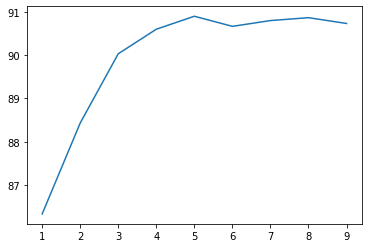

In [16]:
print(step)
print(stepPerf)
plt.plot(step, stepPerf)
plt.show()